target: true(0), fake(1)

In [ ]:
import nltk
import string
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

nltk.download('stopwords')
nltk.download('punkt')

In [1]:


url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-A_Million_News_Headlines/main/abcnews-date-text.csv'

true_news_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-A_Million_News_Headlines/main/Fake_and_real_news_dataset/raw_dataset/True.csv'
fake_news_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-A_Million_News_Headlines/main/Fake_and_real_news_dataset/raw_dataset/Fake.csv'



df_true = pd.read_csv(true_news_url)
df_fake = pd.read_csv(fake_news_url)


In [6]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

In [5]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  target  
0  December 31, 2017       1  
1  December 31, 2017       1  
2  December 30, 2017       1  
3  December 29, 2017       1  
4  December 25, 2017       1

In [4]:
df_true['target'] = 0
df_fake['target'] = 1

In [8]:
print('shape ', df_true.shape, ', ', df_fake.shape)



shape  (21417, 5) ,  (23481, 5)


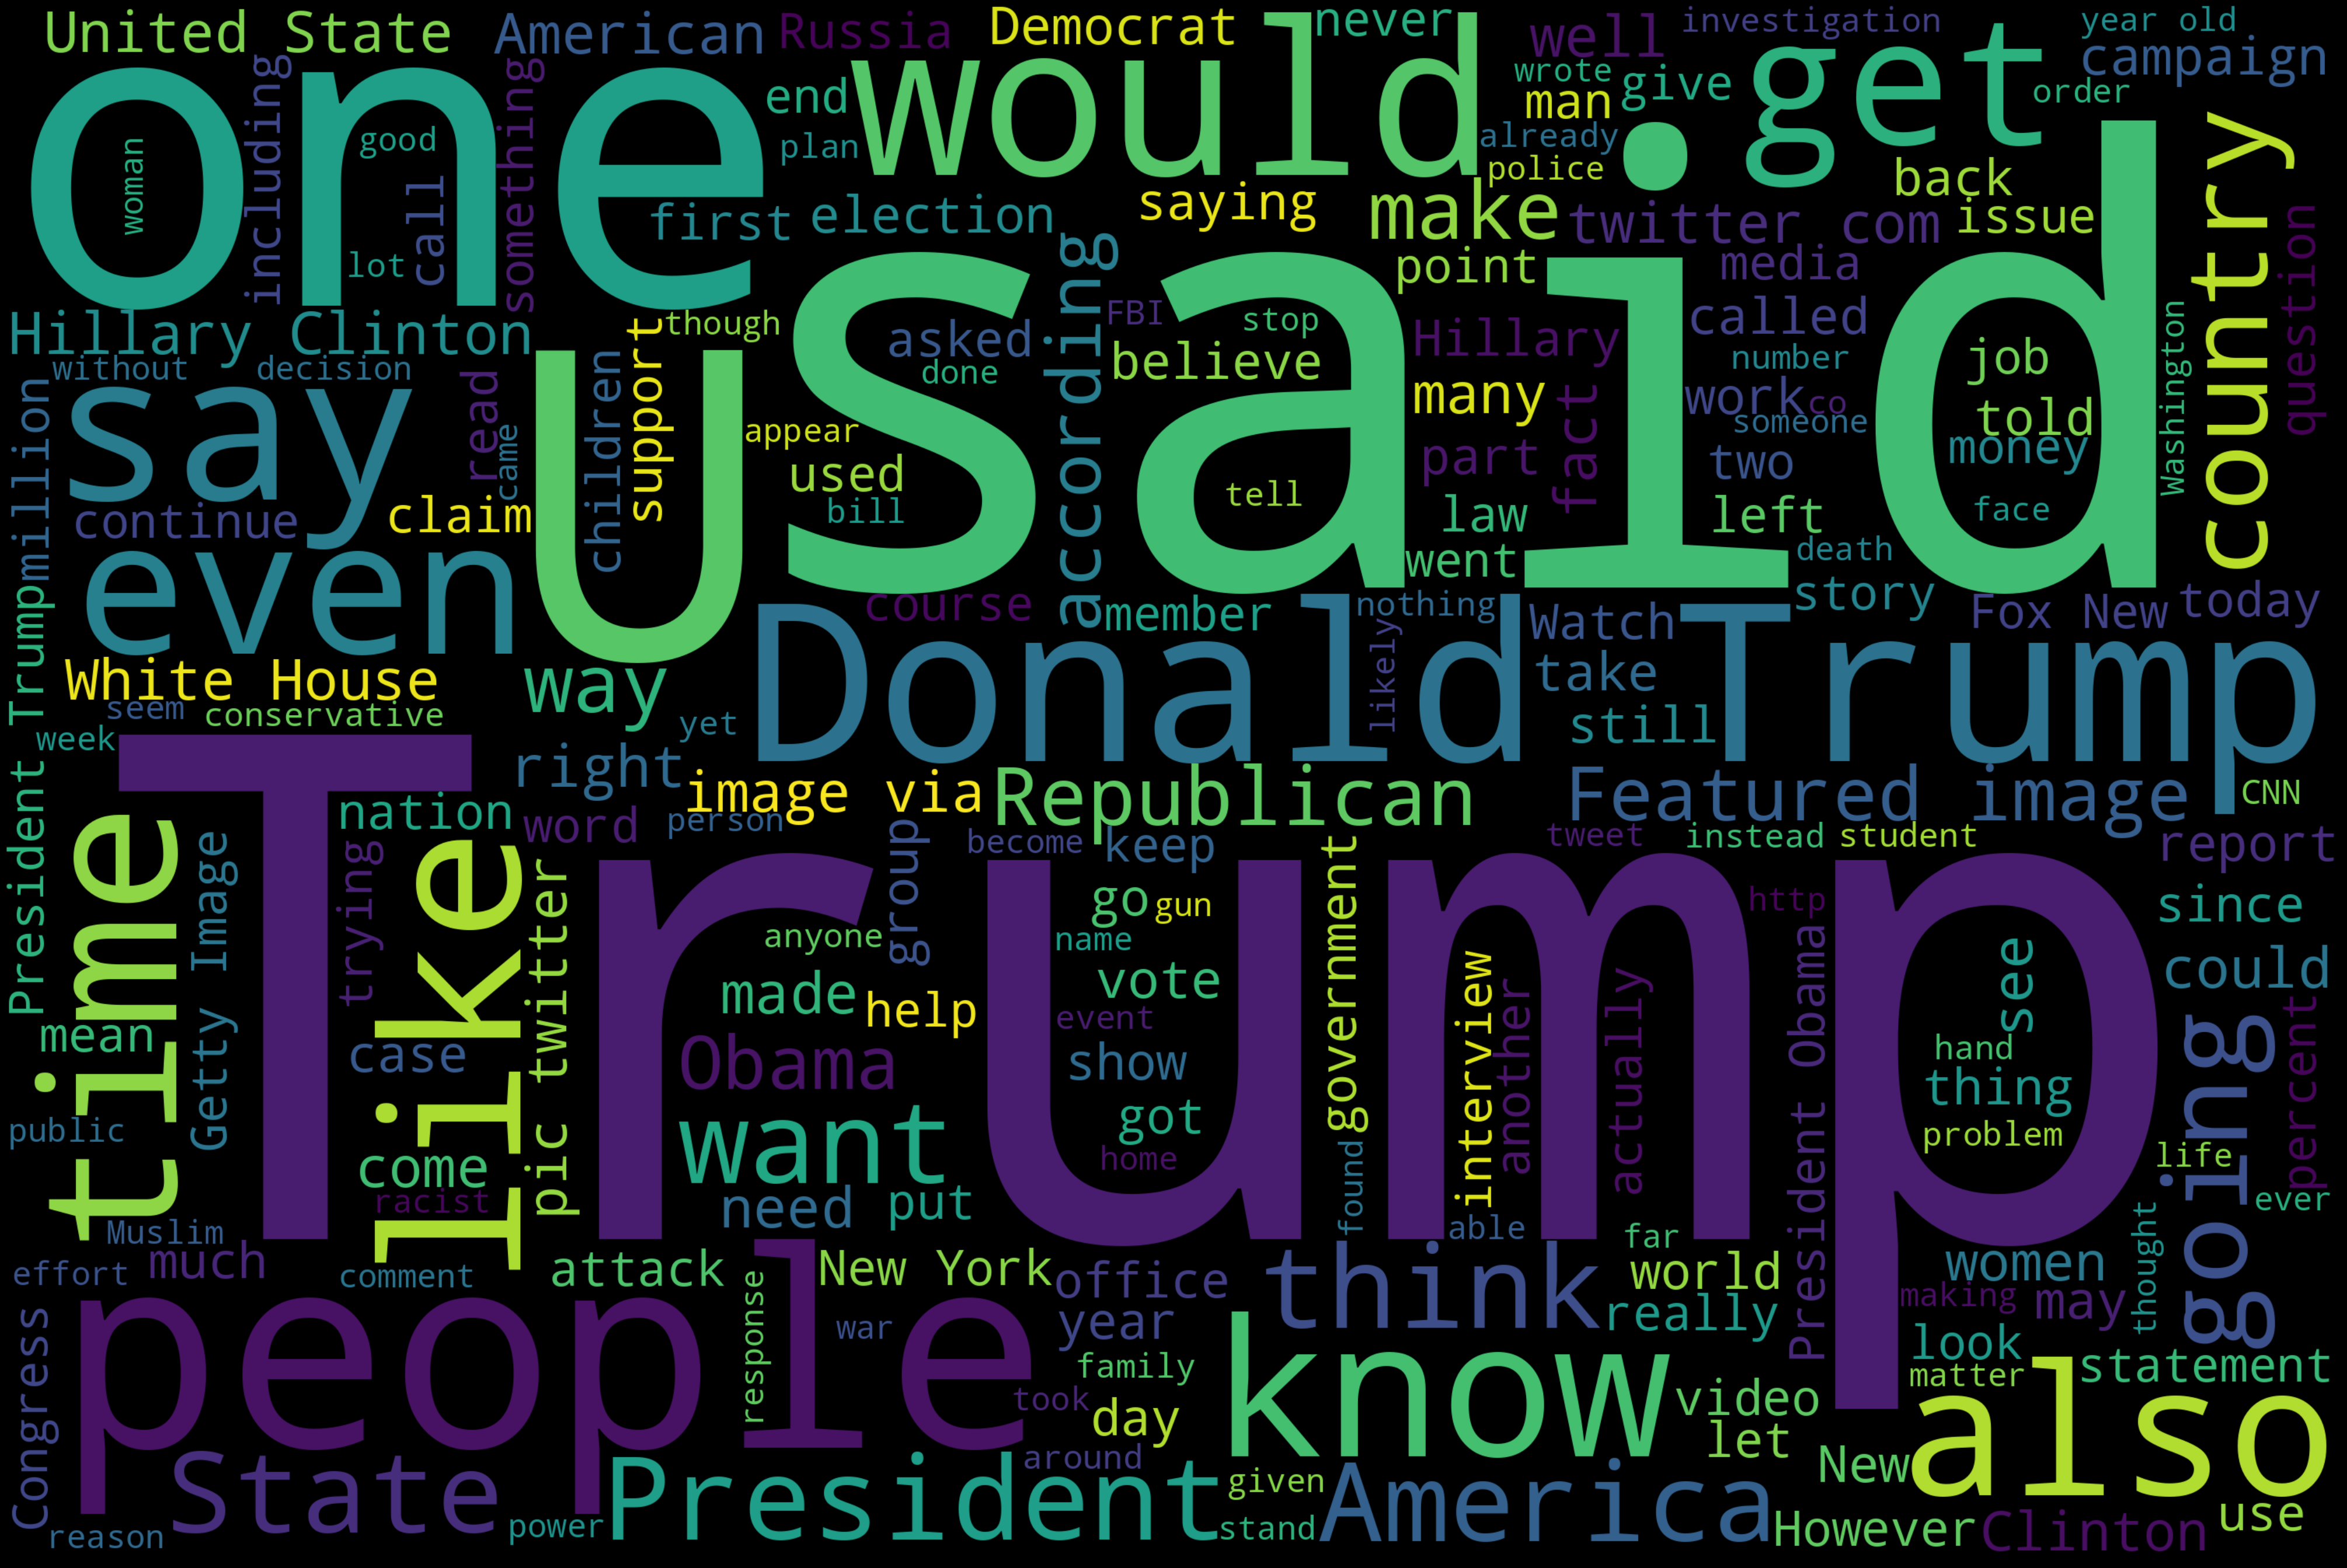

In [11]:


#Word Cloud of fake news
text = ''
for news in df_fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

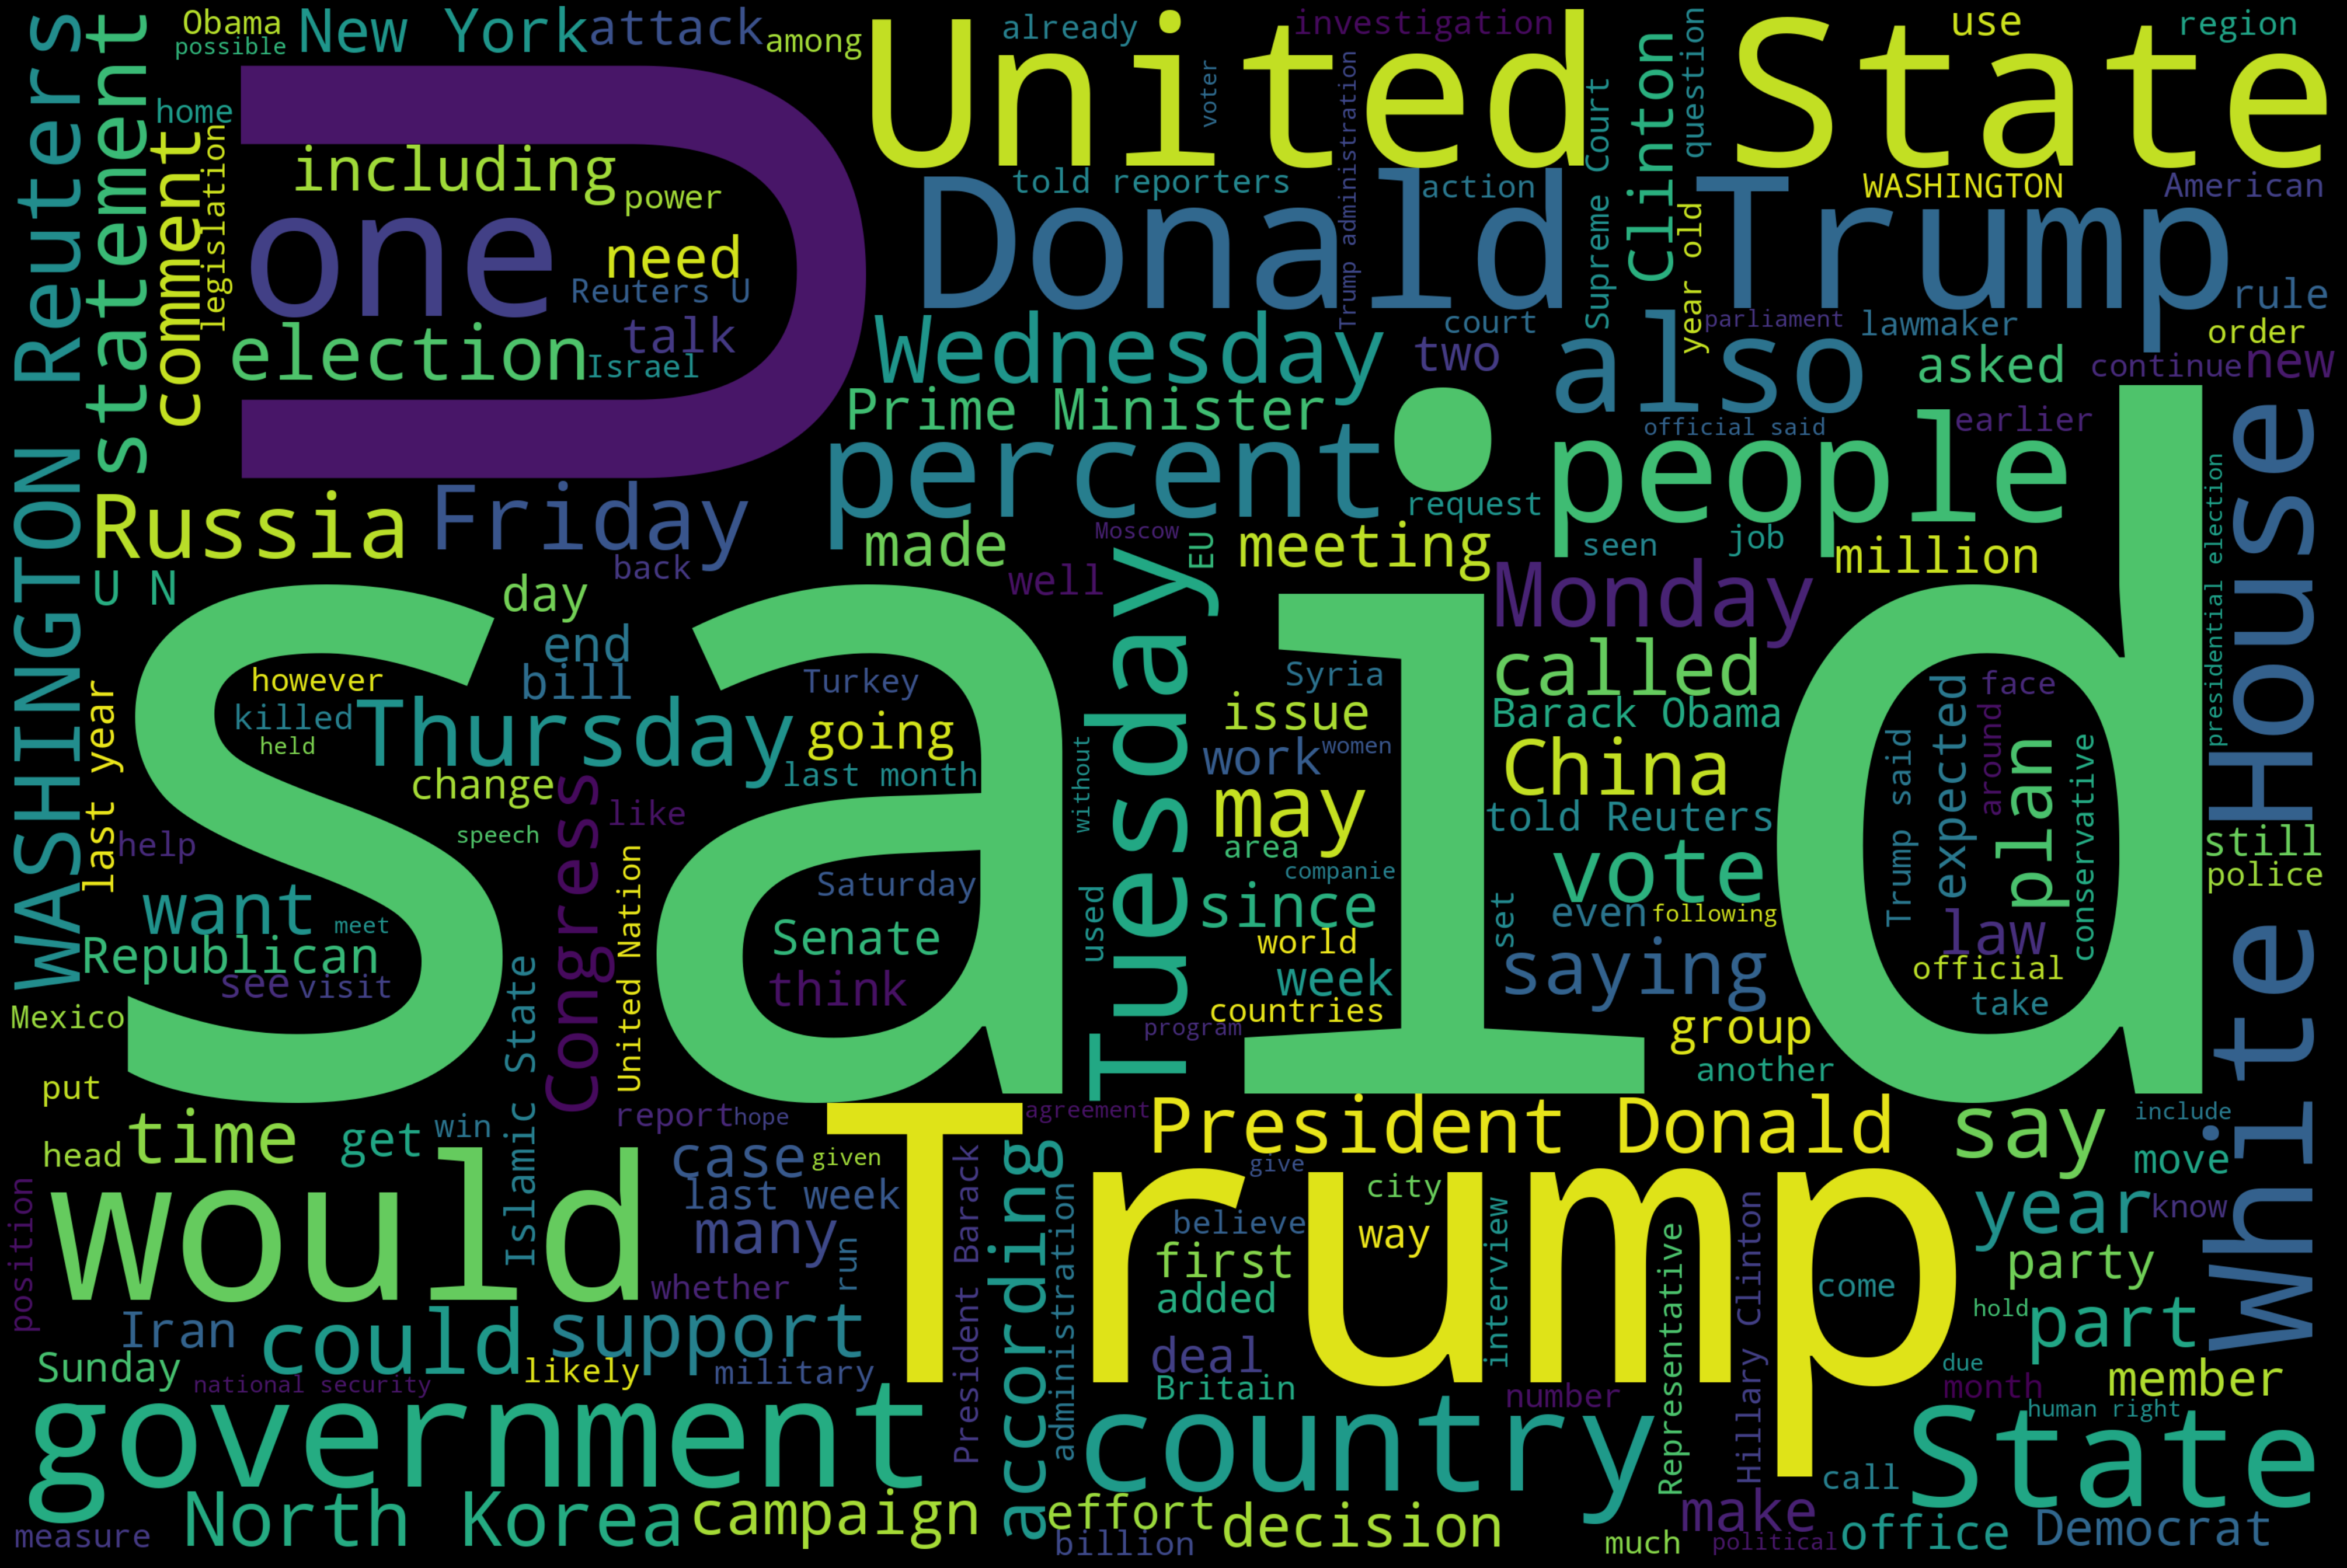

In [13]:
#WordCloud For Real News
text = ''
for news in df_true.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [14]:
#Combining Title and Text
df_true["text"] = df_true["title"] + " " + df_true["text"]
df_fake["text"] = df_fake["title"] + " " + df_fake["text"]

In [15]:
# Subject is diffrent for real and fake thus dropping it
# Aldo dropping Date, title and Publication Info of real
df_true = df_true.drop(["subject", "date", "title"], axis=1)
df_fake = df_fake.drop(["subject", "date", "title"], axis=1)

In [16]:
df_true.head()

text  target
0  As U.S. budget fight looms, Republicans flip t...       0
1  U.S. military to accept transgender recruits o...       0
2  Senior U.S. Republican senator: 'Let Mr. Muell...       0
3  FBI Russia probe helped by Australian diplomat...       0
4  Trump wants Postal Service to charge 'much mor...       0

In [17]:
df_fake.head()

text  target
0   Donald Trump Sends Out Embarrassing New Year’...       1
1   Drunk Bragging Trump Staffer Started Russian ...       1
2   Sheriff David Clarke Becomes An Internet Joke...       1
3   Trump Is So Obsessed He Even Has Obama’s Name...       1
4   Pope Francis Just Called Out Donald Trump Dur...       1

In [19]:
df_news = pd.concat([df_true, df_fake], axis=0)
# data = real.append(fake, ignore_index=True)

In [23]:
len(df_true) + len(df_fake)

44898

In [21]:
df_news.shape

(44898, 2)

In [20]:
df_news.head()

text  target
0  As U.S. budget fight looms, Republicans flip t...       0
1  U.S. military to accept transgender recruits o...       0
2  Senior U.S. Republican senator: 'Let Mr. Muell...       0
3  FBI Russia probe helped by Australian diplomat...       0
4  Trump wants Postal Service to charge 'much mor...       0

In [45]:
df_news = df_news.reset_index()

In [ ]:
# start on computing the word2vec

In [26]:
newsTexts = df_news['text']

In [27]:



stop_words = set(stopwords.words('english'))
# print("stop_words:")
# stop_words
punctuation = set(string.punctuation)
# punctuation

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

preprocessed_newsTexts = [preprocess(text) for text in newsTexts]

In [29]:


model = Word2Vec(preprocessed_newsTexts, vector_size=250, window=5, min_count=1, workers=4)

# Get the Word2Vec vectors for each newsText:
# newsText_vectors = np.array()

newsText_vectors = np.empty((len(preprocessed_newsTexts), model.vector_size), dtype=np.float32)

# Get the Word2Vec vectors for each newsText:
# newsText_vectors = np.empty((len(preprocessed_newsTexts), model.vector_size), dtype=np.float32)

for i, newsText in enumerate(preprocessed_newsTexts):
    vector = sum([model.wv[word] for word in newsText if word in model.wv])
    newsText_vectors[i] = vector

In [30]:
len(newsText_vectors)

44898

In [ ]:
w2v_df = pd.DataFrame(newsText_vectors, dtype=float)


In [42]:
w2v_df

0           1           2           3          4           5    \
0       76.089134  111.891899   83.040634 -230.633743 -58.075974  257.050781   
1      165.381317  148.690323  112.640076 -128.012909  18.291080   83.791595   
2       35.963501  194.378922   33.754692 -101.244164 -31.473198   58.138603   
3       63.304482  127.738274  -21.535141  -59.371391 -13.245415   45.339760   
4       80.099777   38.637901   27.399906 -279.661102  15.153675  213.821457   
...           ...         ...         ...         ...        ...         ...   
44893   71.172447   29.576962    9.814576 -114.468605  10.421734   71.369278   
44894   49.767658   14.141649   24.830746  -39.896648  17.792511  -24.986475   
44895   21.184694  193.273743  -21.810898 -881.616882  59.446217  742.972473   
44896  -11.720924  -19.239174   26.855413  -27.201494 -16.071684   87.845459   
44897   93.891685   63.320034   47.508610 -144.447601  75.634521  155.760361   

             6           7           8           9    ...         240  \
0      33.574692  121.591164    1.534797 -136.893478  ...   42.452278   
1     -81.372841  123.980354   11.166133   17.662382  ...   53.041889   
2       1.319836  123.404030  -97.246490  -48.950760  ...  160.057907   
3       3.509994   92.514626  -88.460434  -12.191431  ...  150.369141   
4      55.027672  -46.320877   -6.499963   18.798340  ...   73.766518   
...          ...         ...         ...         ...  ...         ...   
44893 -19.829683  182.287994 -168.829971  -16.698744  ...   89.427742   
44894 -14.721946   48.350887   12.321180   41.165245  ...   27.642094   
44895  31.955414  826.063293 -849.959290   -8.474980  ...  711.503235   
44896  19.739613  129.176987 -113.808846    3.524714  ...   89.438515   
44897  26.103643  333.590607 -202.769089  -44.548782  ...  237.416702   

               241         242         243         244         245  \
0      -150.614395   58.985607  202.579559 -178.152649  236.641144   
1      -139.220505    6.865510   88.248108 -196.057449    3.397798   
2       -70.667305   53.698757  159.106445  -51.326168  105.289841   
3       -70.567566   50.938023  103.309296   -7.114745   86.394791   
4      -187.330658   55.890907  201.640411  -16.693233  216.730087   
...            ...         ...         ...         ...         ...   
44893   -98.183441   47.153919   16.384344    7.214799  -16.159613   
44894   -17.996445   15.147109   20.384314  -26.027142    5.624276   
44895 -1192.223511  209.601578  611.738037   44.896534  436.083008   
44896   -71.951553   18.072672  115.359062   32.927032   64.880394   
44897  -182.988831   25.886610  121.868004    3.733052   11.839625   

              246          247         248         249  
0      413.490448  -187.805435  195.260895  -69.905609  
1      292.449585  -205.278229   81.772591 -107.773155  
2      116.140770   -31.169456   -9.729811  -40.059967  
3       -0.029950     7.805309  -30.301466  -58.680027  
4      100.197075  -216.734711  155.619629 -121.154930  
...           ...          ...         ...         ...  
44893  142.430328   -36.919342    3.927083  -52.101486  
44894   43.764351   -58.034969   42.735729  -57.203762  
44895  890.661560 -1118.760498  176.455963 -366.670959  
44896   32.569496  -110.810188   89.154694  -60.245560  
44897  205.585999   -76.208031   -0.851585  -98.231194  

[44898 rows x 250 columns]

In [48]:
w2v_df['target'] = df_news['target']

In [50]:
w2v_df.head()

0           1           2           3          4           5  \
0   76.089134  111.891899   83.040634 -230.633743 -58.075974  257.050781   
1  165.381317  148.690323  112.640076 -128.012909  18.291080   83.791595   
2   35.963501  194.378922   33.754692 -101.244164 -31.473198   58.138603   
3   63.304482  127.738274  -21.535141  -59.371391 -13.245415   45.339760   
4   80.099777   38.637901   27.399906 -279.661102  15.153675  213.821457   

           6           7          8           9  ...         241        242  \
0  33.574692  121.591164   1.534797 -136.893478  ... -150.614395  58.985607   
1 -81.372841  123.980354  11.166133   17.662382  ... -139.220505   6.865510   
2   1.319836  123.404030 -97.246490  -48.950760  ...  -70.667305  53.698757   
3   3.509994   92.514626 -88.460434  -12.191431  ...  -70.567566  50.938023   
4  55.027672  -46.320877  -6.499963   18.798340  ... -187.330658  55.890907   

          243         244         245         246         247         248  \
0  202.579559 -178.152649  236.641144  413.490448 -187.805435  195.260895   
1   88.248108 -196.057449    3.397798  292.449585 -205.278229   81.772591   
2  159.106445  -51.326168  105.289841  116.140770  -31.169456   -9.729811   
3  103.309296   -7.114745   86.394791   -0.029950    7.805309  -30.301466   
4  201.640411  -16.693233  216.730087  100.197075 -216.734711  155.619629   

          249  target  
0  -69.905609       0  
1 -107.773155       0  
2  -40.059967       0  
3  -58.680027       0  
4 -121.154930       0  

[5 rows x 251 columns]

In [49]:
w2v_df.shape

(44898, 251)

In [51]:
w2v_df

0           1           2           3          4           5  \
0       76.089134  111.891899   83.040634 -230.633743 -58.075974  257.050781   
1      165.381317  148.690323  112.640076 -128.012909  18.291080   83.791595   
2       35.963501  194.378922   33.754692 -101.244164 -31.473198   58.138603   
3       63.304482  127.738274  -21.535141  -59.371391 -13.245415   45.339760   
4       80.099777   38.637901   27.399906 -279.661102  15.153675  213.821457   
...           ...         ...         ...         ...        ...         ...   
44893   71.172447   29.576962    9.814576 -114.468605  10.421734   71.369278   
44894   49.767658   14.141649   24.830746  -39.896648  17.792511  -24.986475   
44895   21.184694  193.273743  -21.810898 -881.616882  59.446217  742.972473   
44896  -11.720924  -19.239174   26.855413  -27.201494 -16.071684   87.845459   
44897   93.891685   63.320034   47.508610 -144.447601  75.634521  155.760361   

               6           7           8           9  ...          241  \
0      33.574692  121.591164    1.534797 -136.893478  ...  -150.614395   
1     -81.372841  123.980354   11.166133   17.662382  ...  -139.220505   
2       1.319836  123.404030  -97.246490  -48.950760  ...   -70.667305   
3       3.509994   92.514626  -88.460434  -12.191431  ...   -70.567566   
4      55.027672  -46.320877   -6.499963   18.798340  ...  -187.330658   
...          ...         ...         ...         ...  ...          ...   
44893 -19.829683  182.287994 -168.829971  -16.698744  ...   -98.183441   
44894 -14.721946   48.350887   12.321180   41.165245  ...   -17.996445   
44895  31.955414  826.063293 -849.959290   -8.474980  ... -1192.223511   
44896  19.739613  129.176987 -113.808846    3.524714  ...   -71.951553   
44897  26.103643  333.590607 -202.769089  -44.548782  ...  -182.988831   

              242         243         244         245         246  \
0       58.985607  202.579559 -178.152649  236.641144  413.490448   
1        6.865510   88.248108 -196.057449    3.397798  292.449585   
2       53.698757  159.106445  -51.326168  105.289841  116.140770   
3       50.938023  103.309296   -7.114745   86.394791   -0.029950   
4       55.890907  201.640411  -16.693233  216.730087  100.197075   
...           ...         ...         ...         ...         ...   
44893   47.153919   16.384344    7.214799  -16.159613  142.430328   
44894   15.147109   20.384314  -26.027142    5.624276   43.764351   
44895  209.601578  611.738037   44.896534  436.083008  890.661560   
44896   18.072672  115.359062   32.927032   64.880394   32.569496   
44897   25.886610  121.868004    3.733052   11.839625  205.585999   

               247         248         249  target  
0      -187.805435  195.260895  -69.905609       0  
1      -205.278229   81.772591 -107.773155       0  
2       -31.169456   -9.729811  -40.059967       0  
3         7.805309  -30.301466  -58.680027       0  
4      -216.734711  155.619629 -121.154930       0  
...            ...         ...         ...     ...  
44893   -36.919342    3.927083  -52.101486       1  
44894   -58.034969   42.735729  -57.203762       1  
44895 -1118.760498  176.455963 -366.670959       1  
44896  -110.810188   89.154694  -60.245560       1  
44897   -76.208031   -0.851585  -98.231194       1  

[44898 rows x 251 columns]

In [53]:
file_name = './preprocess_data_set/w2v_vec' + str(model.vector_size) + '.csv'

# the file size is a little bit large, above 200MB, it takes time to write the csv
w2v_df.to_csv(file_name, sep=',', encoding='utf-8', index=False)